In [2]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
!wget -O spam.csv https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv

--2025-06-02 22:12:18--  https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477907 (467K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 466.71K  --.-KB/s    in 0.02s   

2025-06-02 22:12:18 (23.2 MB/s) - ‘spam.csv’ saved [477907/477907]



Перші 5 записів:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Інформація про набір даних:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Розподіл класів:
label
ham     4825
spam     747
Name: count, dtype: int64


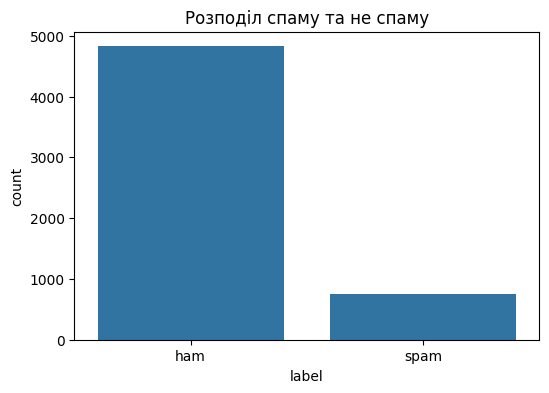

In [3]:
# Читання даних
df = pd.read_csv('spam.csv', sep='\t', header=None, names=['label', 'message'])
print("Перші 5 записів:")
print(df.head())
print("\nІнформація про набір даних:")
print(df.info())
print("\nРозподіл класів:")
print(df['label'].value_counts())

# Візуалізація розподілу класів
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Розподіл спаму та не спаму')
plt.show()

In [4]:
# Попередня обробка даних
# Перетворення міток на числові значення (0 - ham, 1 - spam)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Розділення даних на навчальний та тестовий набори
X = df['message']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Векторизація тексту
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Навчання моделі (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Прогнозування
y_pred = model.predict(X_test_tfidf)


Точність моделі: 0.97847533632287

Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



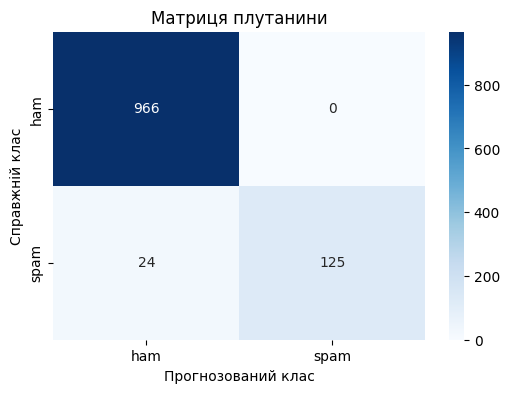

In [6]:
# Оцінка моделі
print("\nТочність моделі:", accuracy_score(y_test, y_pred))
print("\nЗвіт про класифікацію:")
print(classification_report(y_test, y_pred))

# Матриця плутанини
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Прогнозований клас')
plt.ylabel('Справжній клас')
plt.title('Матриця плутанини')
plt.show()

In [8]:
# Виведення 200 повідомлень з прогнозами
results = pd.DataFrame({
    'Повідомлення': X_test,
    'Справжній клас': y_test.map({0: 'ham', 1: 'spam'}),
    'Прогнозований клас': pd.Series(y_pred).map({0: 'ham', 1: 'spam'})
})

print("\nПерші 200 повідомлень з результатами:")
pd.set_option('display.max_colwidth', 100)
print(results.head(200))


Перші 200 повідомлень з результатами:
                                                                                            Повідомлення  \
0                                                                                                    NaN   
1                                                                                                    NaN   
2                                                                                                    NaN   
3                                                                                                    NaN   
4                                                                                                    NaN   
..                                                                                                   ...   
195                                                                                                  NaN   
196                                                                                              